Problem Statement:<br>
In this problem we will be using Machine Learning to predict if any person is suffering from heart disease or not.We be also performing Anaylsis on the dataset



<a href="https://www.kaggle.com/ronitf/heart-disease-uci">Dataset<br>
<a href="https://colab.research.google.com/drive/1sDXqWJK4IrZ23KA7vVD35YkgiGY_f2wx?usp=sharing ">Colab-Link</a>

The data set contains:
<ul>
<li>age</li>
<li>sex</li>
<li>chest pain type (4 values)</li>
<li>resting blood pressure</li>
<li>serum cholestoral in mg/dl</li>
<li>fasting blood sugar > 120 mg/dl</li>
<li>resting electrocardiographic results (values 0,1,2)</li>
<li>maximum heart rate achieved</li>
<li>exercise induced angina</li>
<li>oldpeak = ST depression induced by exercise relative to rest</li>
<li>the slope of the peak exercise ST segment</li>
<li>number of major vessels </li>
<li>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
<li> Target : <br>
1 has a heart disease <br>
0 : not has a heart disease </br>

#Importing all the dependencies

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Loading the Data

In [98]:
data = pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [99]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [100]:
data.shape

(303, 14)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [102]:
data.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [103]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Analysis of the Dataset

In [104]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

conclusion : The above analysis tell us that our data set has no null values

In [105]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Conclusion:The no of males(1) and female(0) count in the dataset

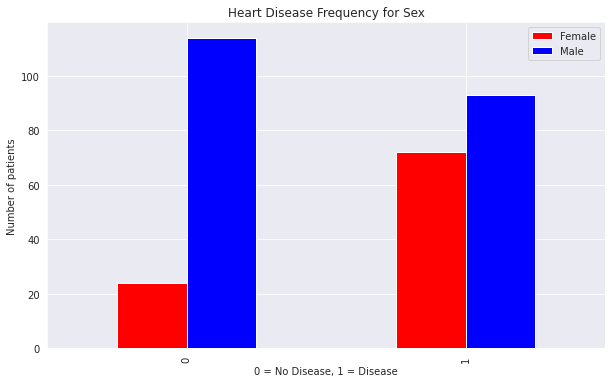

In [106]:
pd.crosstab(data.target, data.sex).plot(kind="bar",figsize=(10, 6),color=["red", "blue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of patients")
plt.legend(["Female", "Male"]);


conclusion: males have a high probabilty of having heart disease over females

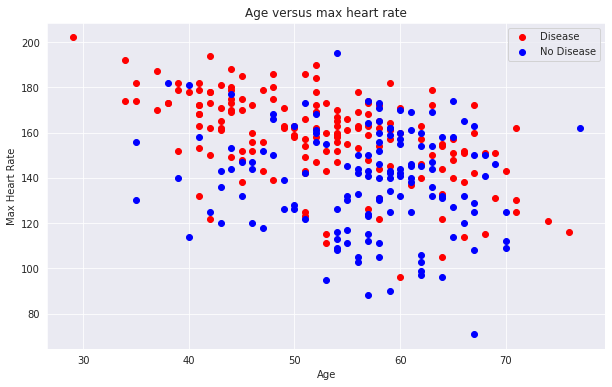

In [107]:
plt.figure(figsize=(10,6))
plt.scatter(data.age[data.target==1],data.thalach[data.target==1],c = "red")
plt.scatter(data.age[data.target==0],data.thalach[data.target==0],c = "blue")
plt.title("Age versus max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

conclusion: There is a less possibilty of disease after 50

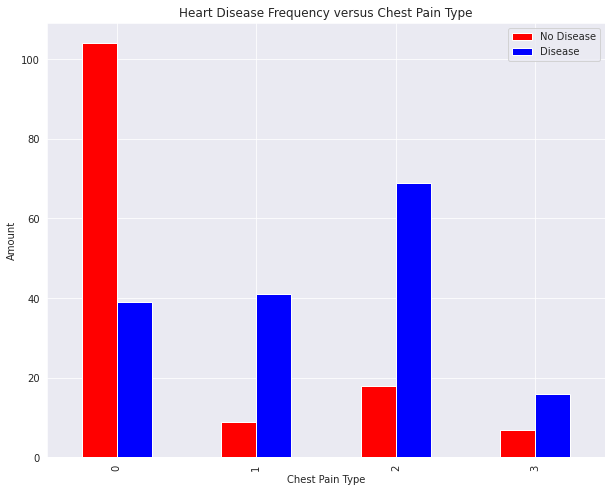

In [108]:
pd.crosstab(data.cp, data.target).plot(kind="bar",figsize=(10, 8),color=["red", "blue"])
plt.title("Heart Disease Frequency versus Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44726cc3d0>,
      dtype=object)

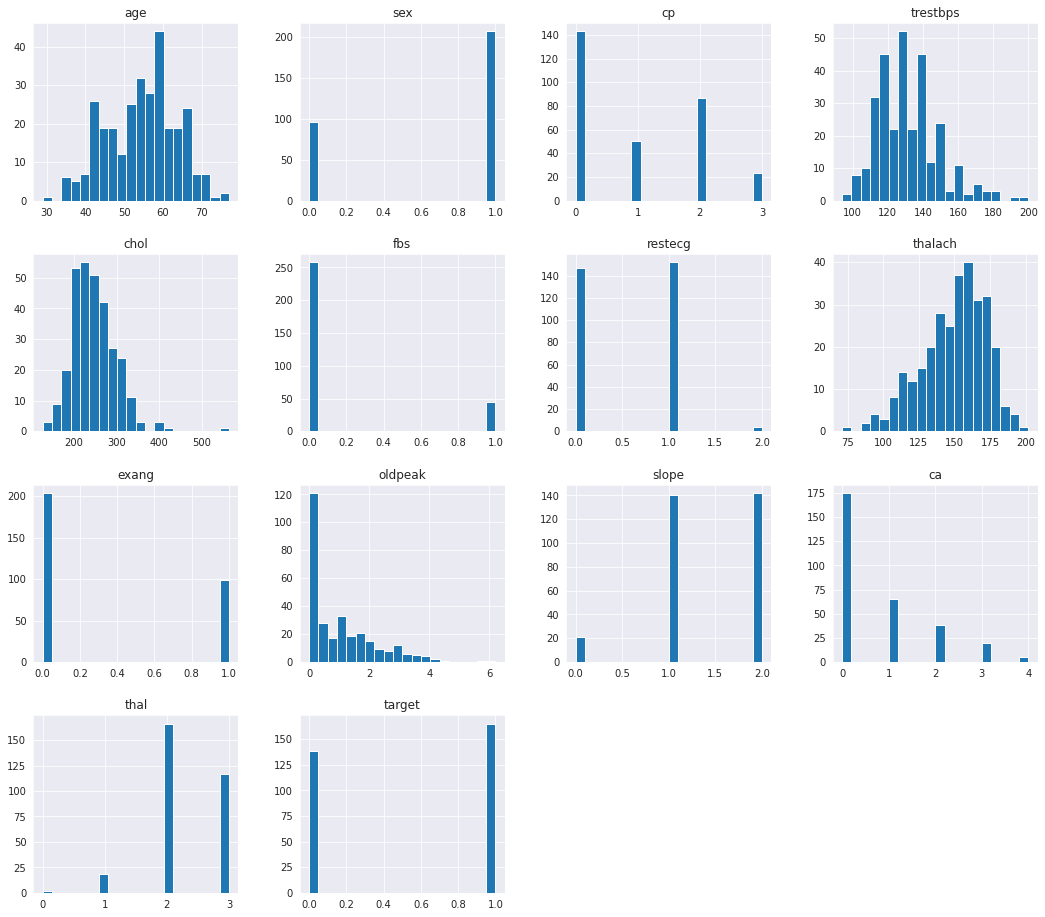

In [109]:
data.hist(bins=20,figsize=(18, 16))

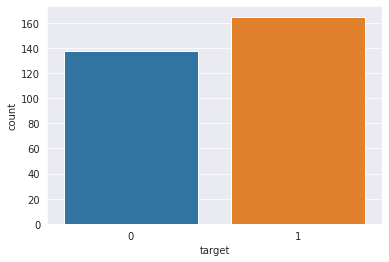

In [110]:
sns.set_style('darkgrid')
figsize=(20, 16)
sns.countplot(x='target',data=data)

In [111]:
data_target = data.groupby("target").size()
data_target

target
0    138
1    165
dtype: int64

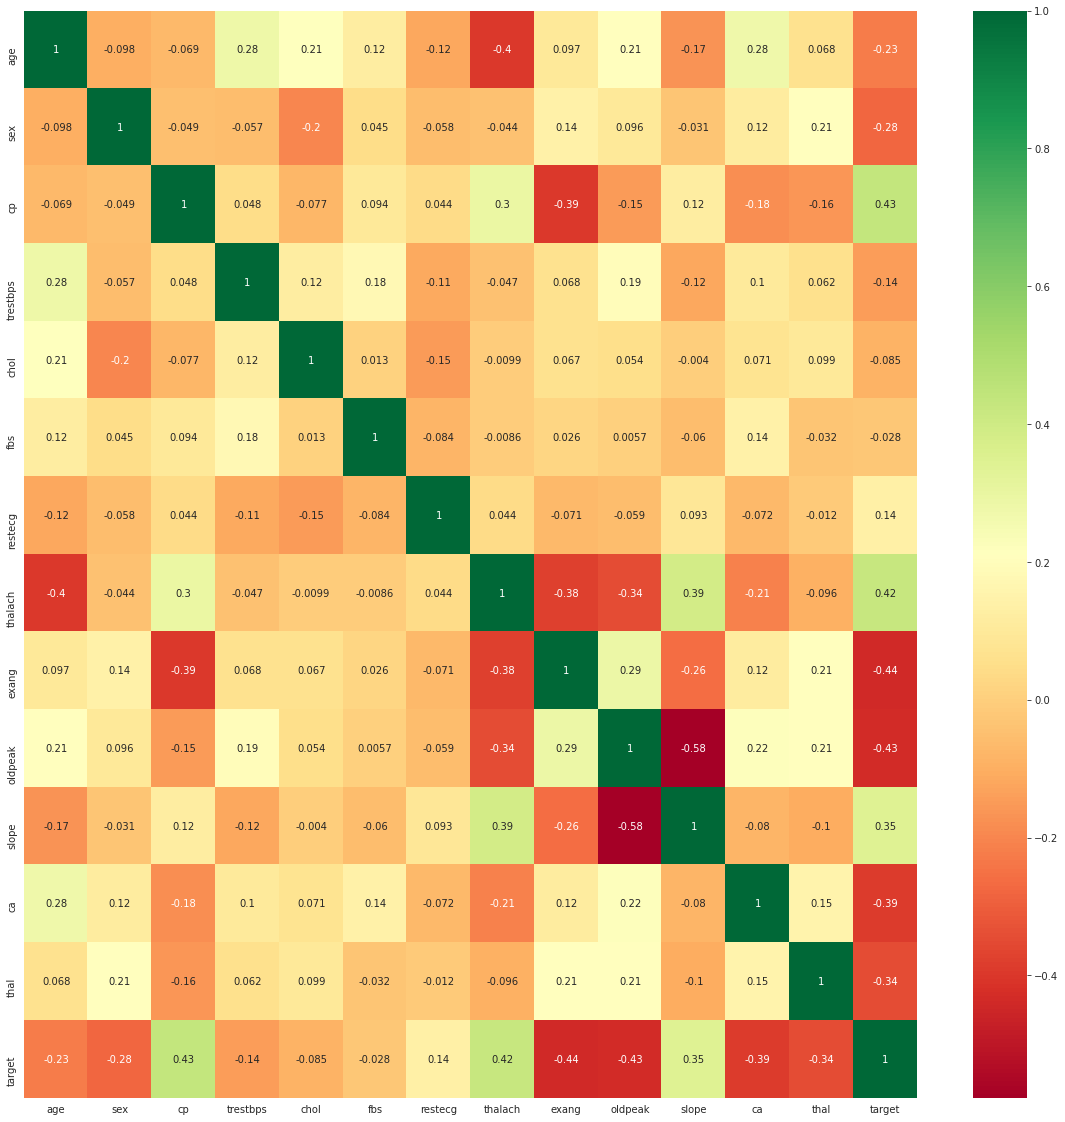

In [112]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [113]:
dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Standardization 

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [115]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [116]:
x = dataset.drop(['target'], axis = 1)
y = dataset['target']


Cross - Validation is used to check the accuracy of the model

#KNearest Classifier<br>


In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [118]:
knn_scores =[]
for k in range(1,21):
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn_classifier,x,y,cv=10)
  knn_scores.append(score.mean())

In [119]:
score.mean()

0.6503225806451614

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

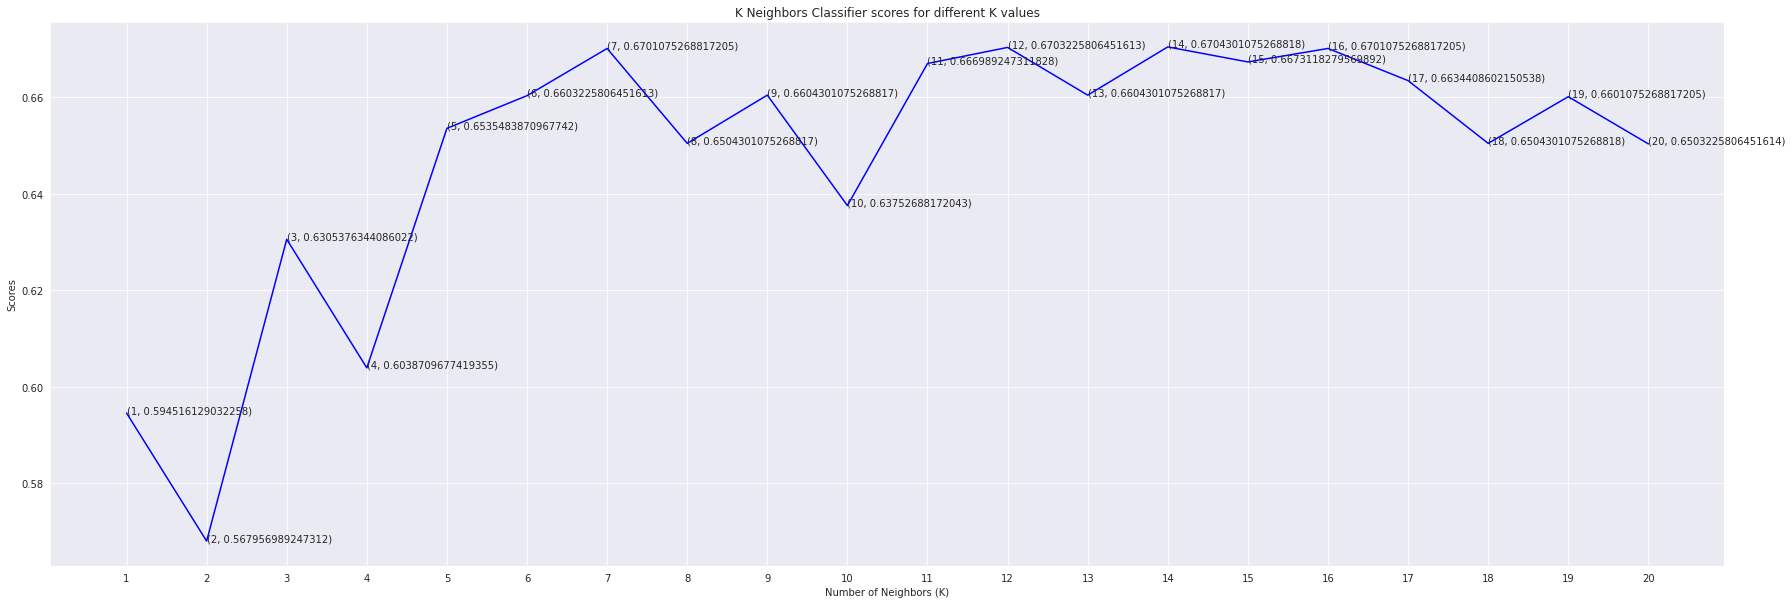

In [120]:
plt.figure(figsize=(30,10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [121]:
knn_classifier = KNeighborsClassifier(n_neighbors=12)
score = cross_val_score(knn_classifier,x,y,cv=10)
score.mean()

0.6703225806451613

#Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [124]:
score.mean()

0.831505376344086

#Decision Tree


In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
decision_classifier= DecisionTreeClassifier()
score=cross_val_score(decision_classifier,x,y,cv=10)

In [127]:
score.mean()

0.7318279569892472

#Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
score=cross_val_score(lr,x,y)

In [132]:
score.mean()

0.851256830601093

In this project I have analysed the data . I have applied diffrent algorithms to find the best fitting model.Hence Logistic regression gives the best accuray that is 85%.